In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

### Algorytm gęstego kodowania
Układ do gęstego kodowania. Qubity q0 i q1 są sprzężone (wprowadzone w stan Bella, a następnie q0 jest przesyłany do odbiorcy - przed rozpoczęciem kodowania). Nadawca koduje klasyczną - bitową informację podaną jako stan qubitów 2 i 3, a następnie przesyła qubit q1 do odbiorcy. Odbiorca używając swojego q0 i otrzymanego q1 odkodowuje informację jako 'klasyczne' bity w q1 i q0


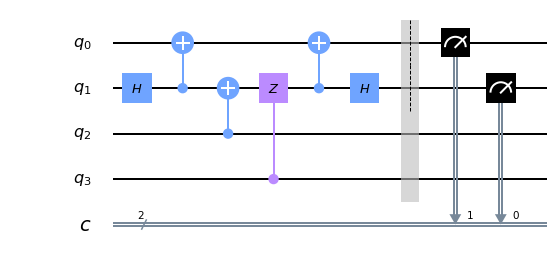

In [2]:
dense_coding = QuantumCircuit(4,2)

dense_coding.h(1)
dense_coding.cx(1,0)
#qubity zostały wprowadzone w stan Bella - q1 należy do nadawcy, a q0 do odbiorcy
dense_coding.cx(2,1)
dense_coding.cz(3,1)
#kodowanie 'bitowej' informacji z q2 q3
dense_coding.cx(1,0)
#tutaj qubit q1 powinien być przesłany do drugiej stoiny 
dense_coding.h(1)

dense_coding.barrier(range(2))
dense_coding.measure([0,1], [1,0])
# pomiar
dense_coding.draw()

In [3]:
def simulate(circuit):
    backend = Aer.get_backend('qasm_simulator')
    job_sim = execute(circuit, backend, shots=1024)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(circuit)
    print(counts)
    
def simulate_statevector(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outputstate = result.get_statevector(circuit, decimals=3)
    print(outputstate)

Gęste kodowanie bitowych 00, 01, 10 i 11

In [4]:
simulate(dense_coding)

zero_one = QuantumCircuit(4,2)
zero_one.x(3)
simulate(zero_one + dense_coding)

one_zero = QuantumCircuit(4,2)
one_zero.x(2)
simulate(one_zero + dense_coding)


one_one = QuantumCircuit(4,2)
one_one.x(2)
one_one.x(3)
simulate(one_one + dense_coding)



{'00': 1024}
{'01': 1024}
{'10': 1024}
{'11': 1024}


### Algorytm teleportacji kwantowej
Podobnie jak w poprzednim układzie q0 i q1 zostają sprzężone, q1 należy do nadawcy, a q0 do odbiorcy. Qubit q3 ma zostać teleportowany. Nadawca aplikuje bramki CNOT i Hadamarda na swoich qubitach, dokonuje pomiaru w bazie Bella i wysyła klasyczną informację do odbiorcy. W tym wypadku do przesłania klasycznej informacji używane są q1 i q2 - pełnią rolę bitów kontrolnych przy rozkodowywaniu. Po zakończeniu układu teleportowany qubit znajduje się w q0.


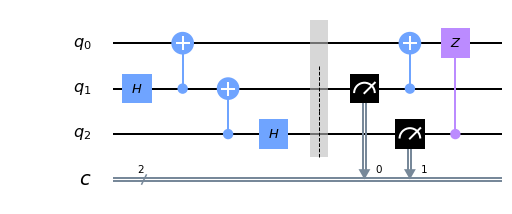

In [5]:
teleportation = QuantumCircuit(3,2)

teleportation.h(1)
teleportation.cx(1,0)
#qubity zostały wprowadzone w stan Bella - q1 należy do nadawcy, a q0 do odbiorcy
teleportation.cx(2,1)
teleportation.h(2)
#CNOT i Hadamard na q2 - qubicie który ma zostać teleportowany
teleportation.barrier([1,2])
teleportation.measure([1,2], [0,1])
#pomiar qubitów nadawcy i przesłanej klasycznej informacji do odbiorcy (w tym wypadku trik z qubitami 1 i 2)
teleportation.cx(1,0)
teleportation.cz(2,0)
teleportation.draw()

Teleportacja qubitu 'unknown'. Układ jest 3 quibitowy |q00> stąd wektor stanu długości 6 i współczynniki q w bazie |10> i |01> na 0 i 3 miejscu. Po wykonaniu układu |q1q2> może być z równym prawdopodobieństwiem każdym z |00> |10> |01> |00> stąd wektor stanu z teleportowanym qubitem może wyglądać różnie - (wsółczynniki teleportowanego qubitu mogą być na różnych miejscach). 

In [6]:
unknown = QuantumCircuit(3,2)
unknown.ry(17.5, 2)
simulate_statevector(unknown)
simulate(unknown + teleportation)
simulate_statevector(unknown + teleportation)

[-0.781+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.625+0.j  0.   +0.j
  0.   +0.j  0.   +0.j]
{'01': 240, '10': 273, '00': 260, '11': 251}
[-0.781+0.j  0.625-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j]


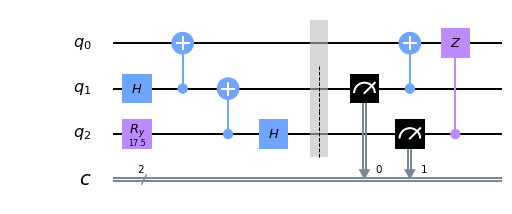

In [7]:
(unknown + teleportation).draw()